<a href="https://colab.research.google.com/github/Said20038/DeepLearning/blob/main/TP_Impl%C3%A9mentation_CNN%E2%80%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Introduction

Convolutional Neural Networks (CNNs) have become a cornerstone of modern computer vision, enabling machines to automatically learn and extract meaningful features from raw image data. Unlike traditional image processing methods, CNNs combine convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully-connected layers for classification into an end-to-end learning framework.

The purpose of this practical work is to explore the fundamentals and applications of CNNs using both **Keras** and **PyTorch**. We begin by building and training a simple CNN on the **MNIST** dataset of handwritten digits, focusing on understanding the role of each layer and key hyperparameters. We then move towards more advanced architectures, such as **VGG-16** and **ResNet**, applying **transfer learning** techniques to leverage pre-trained models for the same classification task.

Through these experiments, the TP aims to provide hands-on experience with CNN implementation, model training and evaluation, and the adaptation of state-of-the-art architectures to new datasets. This not only strengthens understanding of deep learning concepts but also demonstrates the practical advantages of transfer learning in achieving high performance with minimal training effort.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import tensorflow as tf

# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prétraitement des données
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Distribution des classes (pour analyse)
class_distribution = pd.DataFrame({'label': y_train}).value_counts().reset_index(name='count')

# Création du modèle CNN
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'), # Reduced kernel size to (3,3)
    # Removed the last MaxPooling2D layer
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Évaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

# import caas_jupyter_tools as tools; tools.display_dataframe_to_user(name="Répartition des classes dans l'ensemble d'entraînement", dataframe=class_distribution)

test_loss, test_accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 57s - 136ms/step - accuracy: 0.9248 - loss: 0.2478 - val_accuracy: 0.9835 - val_loss: 0.0556
Epoch 2/5
422/422 - 54s - 128ms/step - accuracy: 0.9804 - loss: 0.0629 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 3/5
422/422 - 82s - 194ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 4/5
422/422 - 55s - 130ms/step - accuracy: 0.9891 - loss: 0.0329 - val_accuracy: 0.9912 - val_loss: 0.0296
Epoch 5/5
422/422 - 82s - 194ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9903 - val_loss: 0.0351


(0.03203573450446129, 0.9897000193595886)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Rapport de classification :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



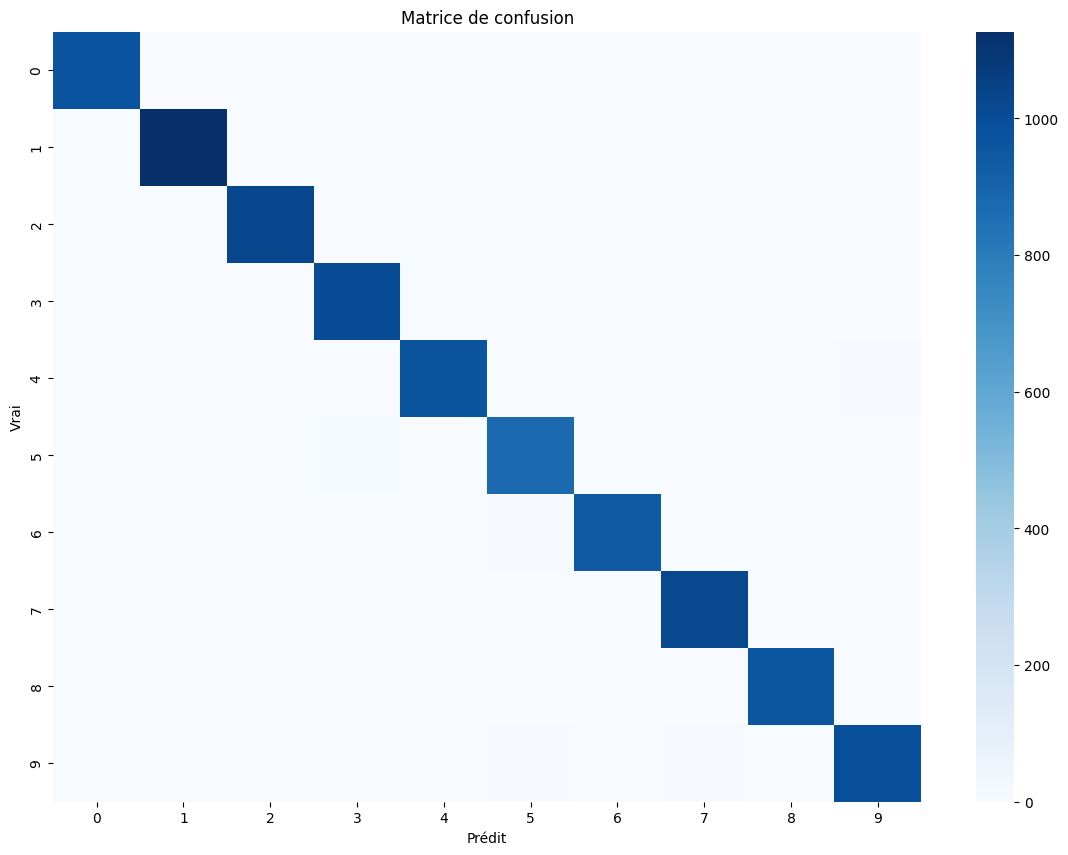

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1) # Corrected to use y_test_cat

# Classification Report (F1-score etc.)
print("Rapport de classification :\n")
print(classification_report(y_true, y_pred_classes)) # Removed target_names=class_names

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=False, cmap="Blues") # Removed xticklabels and yticklabels
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
#  Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ⚙️ Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [ ]:
#  Prétraitement et chargement des données
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalisation MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


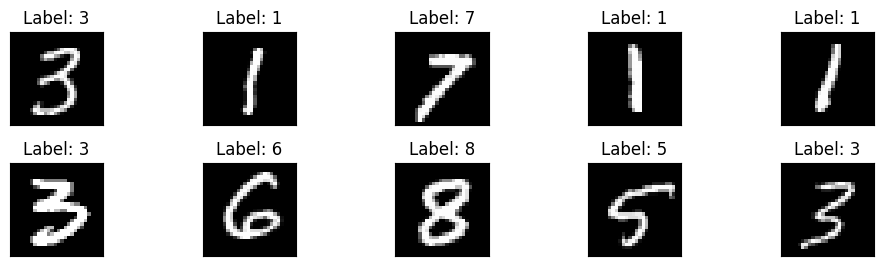

In [ ]:
# Affichage de quelques images
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
#  Définition du modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3) # Reduced kernel size to 3x3
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))
        x = F.relu(self.pool3(self.conv3(x)))
        x = x.view(-1, 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
# Définir l’optimiseur et la fonction de perte
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#  Entraînement du modèle
num_epochs = 5
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Epoch 1, Loss: 0.2385, Test Accuracy: 97.56%
Epoch 2, Loss: 0.0579, Test Accuracy: 98.52%
Epoch 3, Loss: 0.0386, Test Accuracy: 99.07%
Epoch 4, Loss: 0.0285, Test Accuracy: 99.09%
Epoch 5, Loss: 0.0230, Test Accuracy: 99.10%


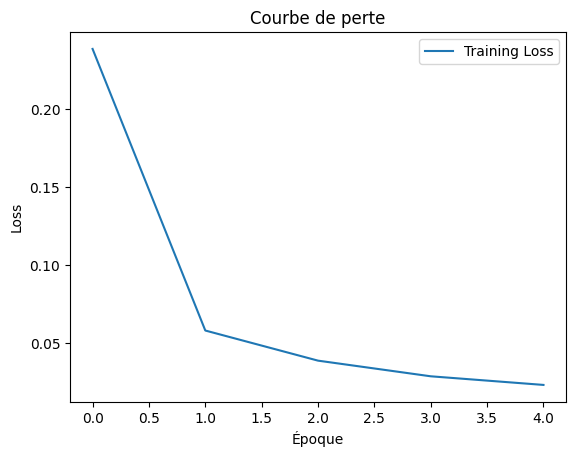

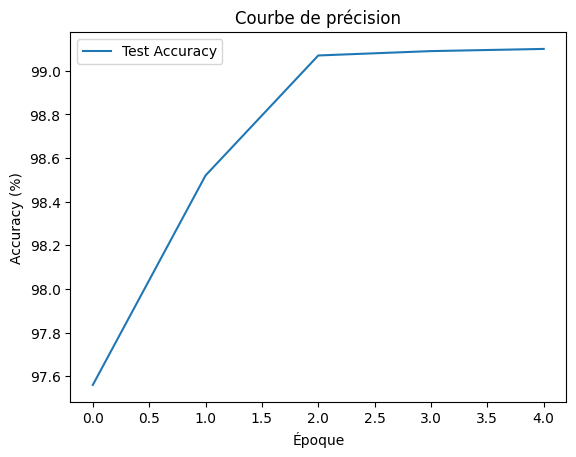

In [ ]:
# Visualisation des résultats
plt.plot(train_losses, label='Training Loss')
plt.title("Courbe de perte")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(val_accuracies, label='Test Accuracy')
plt.title("Courbe de précision")
plt.xlabel("Époque")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


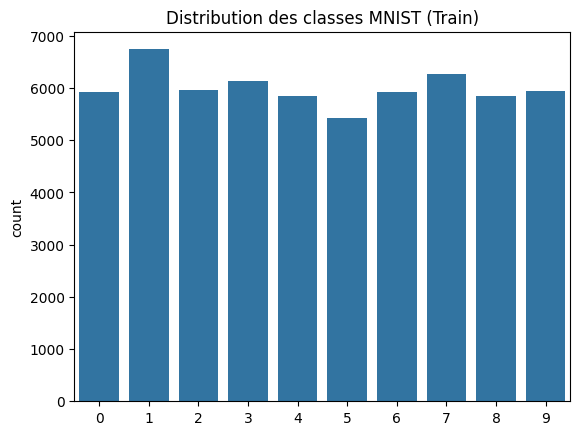

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 172s - 409ms/step - accuracy: 0.9372 - loss: 0.2050 - val_accuracy: 0.9855 - val_loss: 0.0531
Epoch 2/5
422/422 - 198s - 469ms/step - accuracy: 0.9851 - loss: 0.0467 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 3/5
422/422 - 202s - 479ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9907 - val_loss: 0.0319
Epoch 4/5
422/422 - 161s - 382ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9892 - val_loss: 0.0349
Epoch 5/5
422/422 - 204s - 483ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.9917 - val_loss: 0.0282
[Keras CNN] Test Accuracy: 99.22%


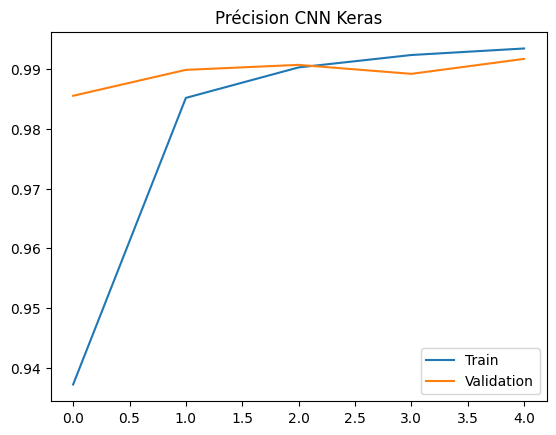

In [1]:
# =========================================================
# 1️⃣ CNN avec Keras - Architecture corrigée
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Chargement MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prétraitement
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Distribution des classes
sns.countplot(x=y_train)
plt.title("Distribution des classes MNIST (Train)")
plt.show()

# Modèle CNN Keras corrigé
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation et entraînement
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Évaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"[Keras CNN] Test Accuracy: {test_acc*100:.2f}%")

# Courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Précision CNN Keras")
plt.legend()
plt.show()


In [3]:
# =========================================================
# 2️⃣ Transfer Learning avec PyTorch - VGG16 et ResNet18
# =========================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transformations (MNIST → RGB + Resize 224)
transform_tl = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset_tl = datasets.MNIST(root='./data', train=True, download=True, transform=transform_tl)
test_dataset_tl = datasets.MNIST(root='./data', train=False, transform=transform_tl)

train_loader_tl = DataLoader(train_dataset_tl, batch_size=32, shuffle=True) # Reduced train batch size
test_loader_tl = DataLoader(test_dataset_tl, batch_size=32, shuffle=False)

# Fonction d'entraînement
def train_model(model, optimizer, criterion, epochs=3):
    model.train()
    for epoch in range(epochs):
        running_loss = 0
        for images, labels in train_loader_tl:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader_tl):.4f}")

# Fonction d'évaluation
def eval_model(model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader_tl:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}%")
    return acc

# ----- VGG16 -----
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(4096, 10)
vgg16 = vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001)

print("\n[Transfer Learning] Training VGG16...")
train_model(vgg16, optimizer, criterion)
acc_vgg16 = eval_model(vgg16)

# ----- ResNet18 -----
resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False
resnet18.fc = nn.Linear(resnet18.fc.in_features, 10)
resnet18 = resnet18.to(device)

optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)

print("\n[Transfer Learning] Training ResNet18...")
train_model(resnet18, optimizer, criterion)
acc_resnet18 = eval_model(resnet18)

# Résumé des performances
print("\n===== Résumé des performances =====")
# Assuming test_acc is available from previous Keras run
try:
  print(f"CNN Keras   : {test_acc*100:.2f}%")
except NameError:
  print("CNN Keras   : N/A (Run the Keras cell first)")

print(f"VGG16 (TL)  : {acc_vgg16:.2f}%")
print(f"ResNet18(TL): {acc_resnet18:.2f}%")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



[Transfer Learning] Training VGG16...
Epoch 1, Loss: 0.3687
Epoch 2, Loss: 0.3165
Epoch 3, Loss: 0.2814
Test Accuracy: 99.03%

[Transfer Learning] Training ResNet18...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 0.3359
Epoch 2, Loss: 0.1658
Epoch 3, Loss: 0.1423
Test Accuracy: 96.37%

===== Résumé des performances =====
CNN Keras   : N/A (Run the Keras cell first)
VGG16 (TL)  : 99.03%
ResNet18(TL): 96.37%
